In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras.optimizers import Adam
from matplotlib import pyplot as plt

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [10]:
y_train_cat = to_categorical(y_train)
y_actuals = y_test
y_test_cat = to_categorical(y_test)

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
cb = ModelCheckpoint("best_model.h5", monitor="val_loss", mode='min',save_best_only=True)

In [14]:
result = model.fit(x_train, y_train_cat, epochs=30   , batch_size=64, validation_split=0.2, callbacks=[cb])

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2238 - loss: 2.7375

625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.3104 - loss: 1.9844 - val_accuracy: 0.4287 - val_loss: 1.5631
Epoch 2/30
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4632 - loss: 1.4783

625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.4827 - loss: 1.4314 - val_accuracy: 0.5014 - val_loss: 1.3908
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5552 - loss: 1.2385

625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.5633 - loss: 1.2267 - val_accuracy: 0.5678 - val_loss: 1.2361
Epoch 4/30
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6384 - loss: 1.0358

625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.6364 - loss: 1.0414 - val_accuracy: 0.5875 - val_loss: 1.1838
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.6937 - loss: 0.8795 - val_accuracy: 0.5746 - val_loss: 1.2907
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.7513 - loss: 0.7145 - val_accuracy: 0.6032 - val_loss: 1.2574
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.8004 - loss: 0.5802 - val_accuracy: 0.6228 - val_loss: 1.2367
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.8412 - loss: 0.4684 - val_accuracy: 0.6051 - val_loss: 1.3482
Epoch 9/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.8741 - loss: 0.3707 - val_accuracy: 0.6026 - val_loss: 1.6422
Epoch 10/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.8980 - loss: 0.3025 - val_accuracy: 0.6240 - val_loss: 1.6740
Epoch 11/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.9202 - loss: 0.2466 - val_accur

In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
predictions = model.predict(x_test)
predictedLabel = np.argmax(predictions, axis=1)
print(f"Predicted label: {(predictedLabel[10])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6090 - loss: 2.5098
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Predicted label: 8


Act: [3] 
 Pred: 3
Act: [8] 
 Pred: 8
Act: [8] 
 Pred: 8
Act: [0] 
 Pred: 0
Act: [6] 
 Pred: 6


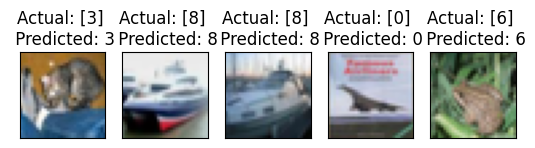

In [16]:
for image in range(5):
    print(f"Act: {y_test[image]} \n Pred: {predictedLabel[image]}")
    plt.subplot(1,5,image+1, title=f"Actual: {y_actuals[image]} \n Predicted: {predictedLabel[image]}")
    plt.imshow(x_test[image])
    plt.xticks([])
    plt.yticks([])
plt.show()

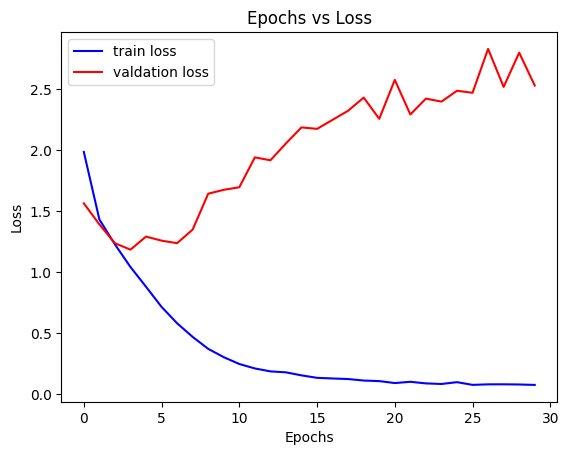

In [17]:
plt.plot(result.history['loss'],label='train loss',color='blue')
plt.plot(result.history['val_loss'],label='valdation loss',color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend()
plt.show()

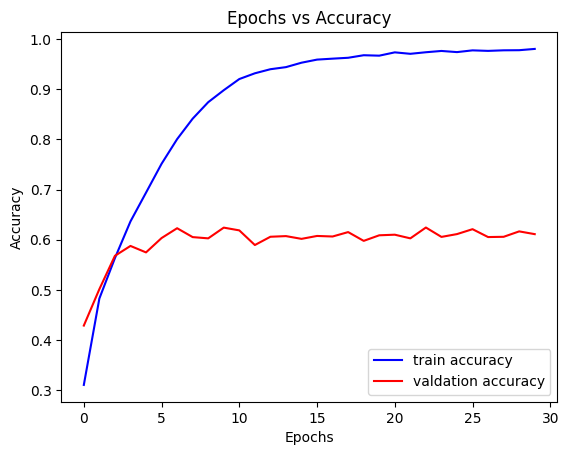

In [18]:
plt.plot(result.history['accuracy'],label='train accuracy',color='blue')
plt.plot(result.history['val_accuracy'],label='valdation accuracy',color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs vs Accuracy")
plt.legend()
plt.show()